## Analisi Livello Idrometrico
Partendo da un DataSet della città di Bari, scaricato dal sito dell'ISPRA, abbiamo definito i campi con i correlativi dati utili all'analisi del livello idrometrico della città nelle ultime 24 ore.  

In [21]:
import pandas as pd
df_iniziale = pd.read_csv("BARI_24.csv", delimiter =';')
df_iniziale

,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ACQUA,TEMPERATURA ARIA,UMIDITÀ RELATIVA,PRESSIONE ATMOSFERICA,DIREZIONE VENTO,VELOCITÀ VENTO
0,2025-02-02,08:00,"-0,194","12,2","11,8",88,1019,148,"4,2"
1,2025-02-02,08:10,"-0,213",NaN,"12,2",87,NaN,141,"3,9"
2,2025-02-02,08:20,"-0,225",NaN,"12,4",87,NaN,140,"3,6"
3,2025-02-02,08:30,"-0,249",NaN,"12,7",87,NaN,144,"3,8"
4,2025-02-02,08:40,"-0,247",NaN,"12,7",87,NaN,138,"4,3"
...,...,...,...,...,...,...,...,...,...
140,2025-02-03,07:20,"-0,093",NaN,"10,8",92,NaN,255,2
141,2025-02-03,07:30,"-0,11",NaN,11,91,NaN,266,"2,6"
142,2025-02-03,07:40,"-0,119",NaN,"11,2",90,NaN,263,3
143,2025-02-03,07:50,"-0,146",NaN,"11,4",88,NaN,277,"3,6"


Successivamente abbiamo volutamente deciso di pulire il DataSet accorpando le misurazioni del livello idrometrico, dell'umidità e della temperatura, rilevate ogni 10 minuti, in una media oraria. Per i valori della pressione non è stato effettuato questo processo in quanto le misurazioni rilevate sono ogni ora.

In [1]:
import pandas as pd
 
def calcola_dati():
    file_name = "BARI_24.csv"
    df = pd.read_csv(file_name, delimiter=";")
   
    df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
    df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
   
    df['PRESSIONE ATMOSFERICA'] = df['PRESSIONE ATMOSFERICA'].astype(str).str.replace(',', '.')
    df['PRESSIONE ATMOSFERICA'] = pd.to_numeric(df['PRESSIONE ATMOSFERICA'], errors='coerce')
   
    df['TEMPERATURA ARIA'] = df['TEMPERATURA ARIA'].astype(str).str.replace(',', '.')
    df['TEMPERATURA ARIA'] = pd.to_numeric(df['TEMPERATURA ARIA'], errors='coerce')
   
    df['UMIDITÀ RELATIVA'] = df['UMIDITÀ RELATIVA'].astype(str).str.replace(',', '.')
    df['UMIDITÀ RELATIVA'] = pd.to_numeric(df['UMIDITÀ RELATIVA'], errors='coerce')
   
    df['ORA'] = pd.to_datetime(df['ORA'], format='%H:%M').dt.time
   
    df['DATA_ORA'] = pd.to_datetime(df['DATA'] + ' ' + df['ORA'].astype(str))
 
   
    df['LIVELLO_IDROMETRICO_MEDIA ORARIA'] = df['LIVELLO IDROMETRICO'].rolling(window=6, min_periods=6).mean()
    df['TEMPERATURA_ARIA_MEDIA_ORARIA'] = df['TEMPERATURA ARIA'].rolling(window=6, min_periods=6).mean()
    df['UMIDITÀ RELATIVA'] = df['UMIDITÀ RELATIVA'].rolling(window=6, min_periods=6).mean()
 
    df.loc[df.index >= 4, 'LIVELLO_IDROMETRICO_MEDIA ORARIA'] = df['LIVELLO IDROMETRICO'].rolling(window=6).mean().iloc[4:].values
   
    df_ora = df[df['DATA_ORA'].dt.minute == 0].reset_index(drop=True)
    df_ora.index += 1  
   
    df_ora = df_ora[df_ora['DATA_ORA'].dt.time >= pd.to_datetime("00:00", format='%H:%M').time()]
   
    df_ora['ORA'] = df_ora['DATA_ORA'].dt.strftime('%H:%M')

  
    return df_ora
 
 
dati_bari = calcola_dati()
dati_bari = dati_bari[["ORA", "LIVELLO_IDROMETRICO_MEDIA ORARIA", "TEMPERATURA_ARIA_MEDIA_ORARIA", "PRESSIONE ATMOSFERICA", "UMIDITÀ RELATIVA"]]


dati_bari.index = dati_bari.index - 1

 
dati_bari.drop(0, axis=0, inplace=True)
 
print("L'analisi è effettuata sulla città di Bari per un lasso di tempo di 24H per il giorno 02-02-2025")
dati_bari_convertiti = dati_bari
dati_bari

L'analisi è effettuata sulla città di Bari per un lasso di tempo di 24H per il giorno 02-02-2025


,ORA,LIVELLO_IDROMETRICO_MEDIA ORARIA,TEMPERATURA_ARIA_MEDIA_ORARIA,PRESSIONE ATMOSFERICA,UMIDITÀ RELATIVA
1,09:00,-0.247500,12.516667,1018.8,87.000000
2,10:00,-0.316667,12.816667,1018.8,86.000000
3,11:00,-0.363833,11.600000,1018.2,92.500000
4,12:00,-0.371000,11.633333,1017.4,94.666667
5,13:00,-0.333833,11.883333,1016.4,95.000000
6,14:00,-0.266167,12.300000,1016.0,93.333333
7,15:00,-0.198333,12.733333,1015.6,89.666667
8,16:00,-0.128000,12.483333,1015.6,91.166667
9,17:00,-0.079667,12.116667,1015.7,94.166667
10,18:00,-0.056667,12.416667,1015.6,95.500000


C'è la necessità di definire uno standard, e per ogni Parametro Ambientale considerato, l'inserimento della propria unità di misura

In [18]:
dati_bari_convertiti['LIVELLO_IDROMETRICO_MEDIA ORARIA'] = dati_bari_convertiti['LIVELLO_IDROMETRICO_MEDIA ORARIA'].round(3).astype(str) + " m"
dati_bari_convertiti['TEMPERATURA_ARIA_MEDIA_ORARIA'] = dati_bari_convertiti['TEMPERATURA_ARIA_MEDIA_ORARIA'].round(1).astype(str) + " °C"
dati_bari_convertiti['PRESSIONE ATMOSFERICA'] = dati_bari_convertiti['PRESSIONE ATMOSFERICA'].astype(str) + " hPa"
dati_bari_convertiti['UMIDITÀ RELATIVA'] = dati_bari_convertiti['UMIDITÀ RELATIVA'].round(1).astype(str) + " %"
dati_bari_convertiti
   

,ORA,LIVELLO_IDROMETRICO_MEDIA ORARIA,TEMPERATURA_ARIA_MEDIA_ORARIA,PRESSIONE ATMOSFERICA,UMIDITÀ RELATIVA
1,09:00,-0.248 m,12.5 °C,1018.8 hPa,87.0 %
2,10:00,-0.317 m,12.8 °C,1018.8 hPa,86.0 %
3,11:00,-0.364 m,11.6 °C,1018.2 hPa,92.5 %
4,12:00,-0.371 m,11.6 °C,1017.4 hPa,94.7 %
5,13:00,-0.334 m,11.9 °C,1016.4 hPa,95.0 %
6,14:00,-0.266 m,12.3 °C,1016.0 hPa,93.3 %
7,15:00,-0.198 m,12.7 °C,1015.6 hPa,89.7 %
8,16:00,-0.128 m,12.5 °C,1015.6 hPa,91.2 %
9,17:00,-0.08 m,12.1 °C,1015.7 hPa,94.2 %
10,18:00,-0.057 m,12.4 °C,1015.6 hPa,95.5 %


## La temperatura e la pressione influenzano il livello del mare attraverso diversi meccanismi:


1. Espansione termica dell'acqua (Influenza della temperatura)
L'acqua si espande quando si riscalda e si contrae quando si raffredda. Un aumento della temperatura degli oceani causa quindi un'espansione del volume dell'acqua, contribuendo all'innalzamento del livello del mare.
Questo è uno dei principali fattori dell'attuale innalzamento del livello marino dovuto al cambiamento climatico.

2. Variazioni della pressione atmosferica
La pressione atmosferica influenza il livello del mare localmente. Un'area con pressione atmosferica bassa (come nei cicloni e nelle tempeste) tende a far innalzare il livello del mare, poiché c'è meno pressione che "schiaccia" l'acqua verso il basso.

## Visioniamo come incide la pressione atmosferica e la temperatura dell'aria sul livello idrometrico con un grafico:

Possiamo notare che il livello idrometrico e la temperatura dell'aria siano direttamente proporzionali: all'aumentare della temperatura, il livello idrometrico aumenta. Così viceversa: se diminuisce la temperatura anche il livello idrometrico diminuisce.
Ovviamente la temperatura non è il solo fattore ad incidere sul livello marino,come possiamo vedere successivamente ->

Contrariamente al caso precedente, la pressione e il livello idrometrico sono inversamente proporzionali: all'aumentare della pressione, diminuisce il livello marino, e viceversa: se diminuisce la pressione, aumenta il livello marino. 

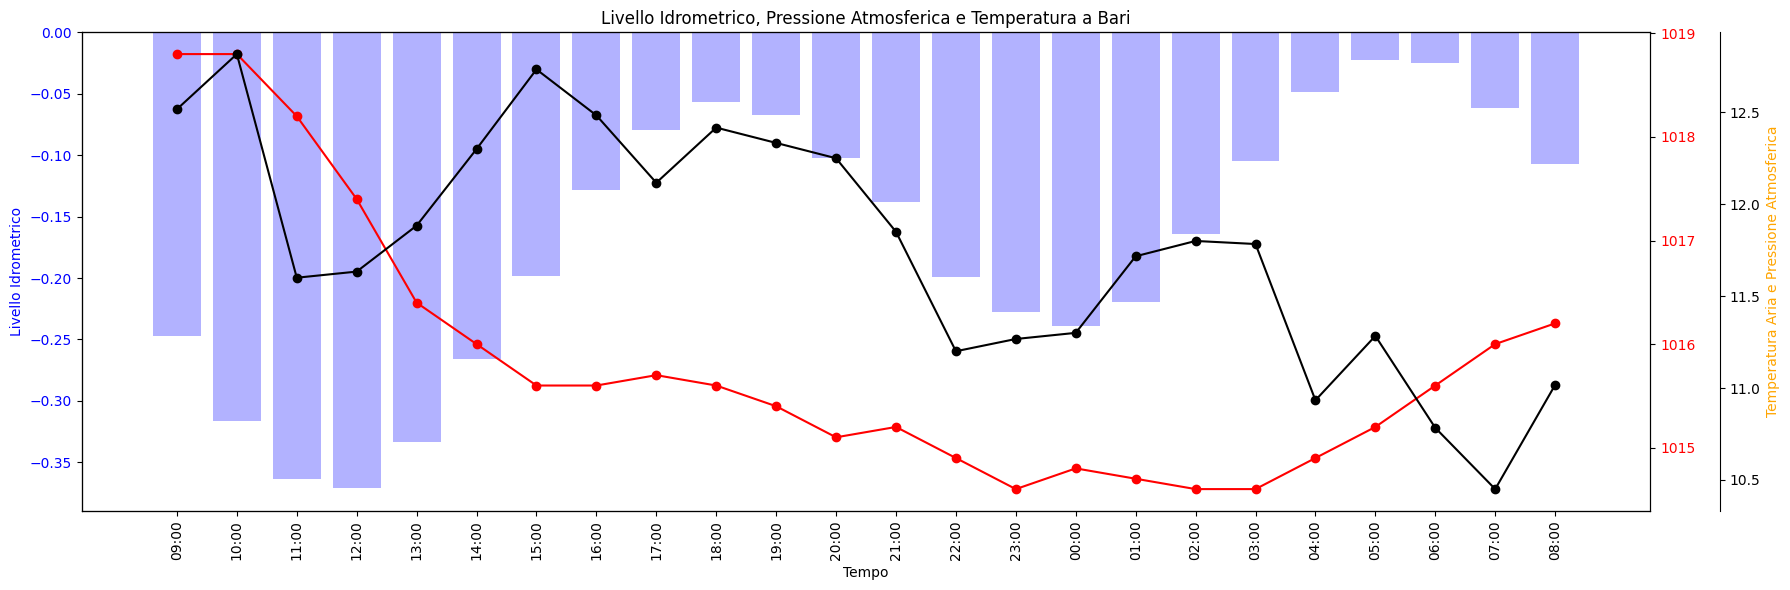

In [29]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(18, 6))

x_labels = dati_bari["ORA"]
ax1.set_xticks(dati_bari.index)  
ax1.set_xticklabels(x_labels, rotation=90)

ax1.bar(dati_bari.index, dati_bari['LIVELLO_IDROMETRICO_MEDIA ORARIA'], color='b', alpha=0.3, label='Livello Idrometrico')
ax1.set_xlabel("Tempo")
ax1.set_ylabel("Livello Idrometrico", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(dati_bari.index, dati_bari['PRESSIONE ATMOSFERICA'], color='r', marker='o', label='Pressione Atmosferica')
ax2.tick_params(axis='y', labelcolor='r')


ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 50)) 
ax3.plot(dati_bari.index, dati_bari['TEMPERATURA_ARIA_MEDIA_ORARIA'], color='black', marker='o', label='Temperatura Aria')
ax3.set_ylabel("Temperatura Aria e Pressione Atmosferica", color='orange')
ax3.tick_params(axis='y', labelcolor='black')



plt.title("Livello Idrometrico, Pressione Atmosferica e Temperatura a Bari")
plt.tight_layout()
plt.show()


## Come incidono i Parametri Ambientali rispetto al livello del mare?

Si può usare il coefficiente di correlazione di Pearson per capire la relazione tra due variabili; l'indice di correlazione di Pearson è definito come la loro covarianza divisa per il prodotto delle deviazioni standard delle due variabili :

In [2]:
import pandas as pd

correlation_pressione = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["PRESSIONE ATMOSFERICA"], method="pearson")
correlation_temperatura = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["TEMPERATURA_ARIA_MEDIA_ORARIA"], method="pearson")
correlation_umidita = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["UMIDITÀ RELATIVA"], method="pearson")


print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e PRESSIONE ATMOSFERICA: {correlation_pressione:.3f}")
print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e TEMPERATURA ARIA: {correlation_temperatura:.3f}")
print(f"Coefficiente di correlazione tra LIVELLO IDROMETRICO e UMIDITÀ RELATIVA: {correlation_umidita:.3f}")

Coefficiente di correlazione tra LIVELLO IDROMETRICO e PRESSIONE ATMOSFERICA: -0.562
Coefficiente di correlazione tra LIVELLO IDROMETRICO e TEMPERATURA ARIA: -0.277
Coefficiente di correlazione tra LIVELLO IDROMETRICO e UMIDITÀ RELATIVA: -0.028


In [3]:
import pandas as pd

correlation_pressione = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["PRESSIONE ATMOSFERICA"], method="pearson")
correlation_temperatura = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["TEMPERATURA_ARIA_MEDIA_ORARIA"], method="pearson")
correlation_umidita = dati_bari["LIVELLO_IDROMETRICO_MEDIA ORARIA"].corr(dati_bari["UMIDITÀ RELATIVA"], method="pearson")


df_correlation = pd.DataFrame({
    "Variabile": ["PRESSIONE ATMOSFERICA", "TEMPERATURA ARIA", "UMIDITÀ RELATIVA"],
    "Coefficiente di Correlazione": [correlation_pressione, correlation_temperatura, correlation_umidita]
})


df_correlation.index = df_correlation.index +1
df_correlation


,Variabile,Coefficiente di Correlazione
1,PRESSIONE ATMOSFERICA,-0.561508
2,TEMPERATURA ARIA,-0.277236
3,UMIDITÀ RELATIVA,-0.028105


In [4]:
import pandas as pd


df_correlation_matrice = dati_bari[[
    "LIVELLO_IDROMETRICO_MEDIA ORARIA", 
    "PRESSIONE ATMOSFERICA", 
    "TEMPERATURA_ARIA_MEDIA_ORARIA", 
    "UMIDITÀ RELATIVA"
]].corr(method="pearson")


df_correlation_matrice


,LIVELLO_IDROMETRICO_MEDIA ORARIA,PRESSIONE ATMOSFERICA,TEMPERATURA_ARIA_MEDIA_ORARIA,UMIDITÀ RELATIVA
LIVELLO_IDROMETRICO_MEDIA ORARIA,1.000000,-0.561508,-0.277236,-0.028105
PRESSIONE ATMOSFERICA,-0.561508,1.000000,0.325825,-0.124372
TEMPERATURA_ARIA_MEDIA_ORARIA,-0.277236,0.325825,1.000000,-0.177270
UMIDITÀ RELATIVA,-0.028105,-0.124372,-0.177270,1.000000


Il risultato è una matrice simmetrica chiamata matrice di correlazione con un valore di 1,0 lungo la diagonale, poiché ogni colonna è sempre perfettamente correlata con se stessa.

## Come interpretare il risultato?

vicino a 1 → Forte correlazione positiva (quando uno aumenta, anche l'altro aumenta).

vicino a -1 → Forte correlazione negativa (quando uno aumenta, l'altro diminuisce).

vicino a 0 → Nessuna correlazione significativa.


## Come ci si aspettava, anche dal grafico sopra riportato, il Parametro Ambientale che maggiormente influisce sul dislivello marino è la Pressione in quanto è la piu vicina al valore -1 (Forte Correlazione negativa)

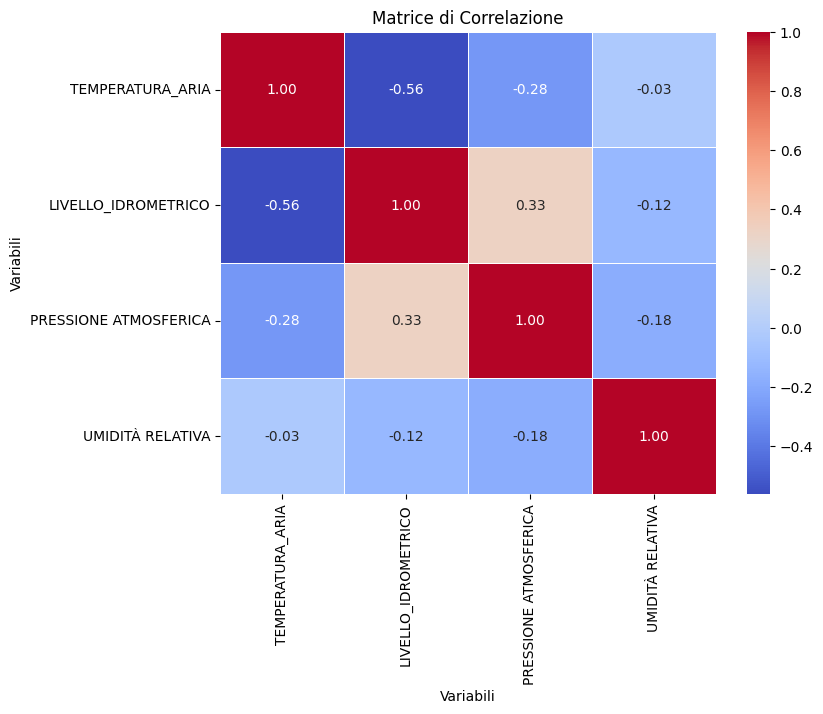

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation_matrice, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            xticklabels=["TEMPERATURA_ARIA", "LIVELLO_IDROMETRICO", "PRESSIONE ATMOSFERICA", "UMIDITÀ RELATIVA"],
            yticklabels=["TEMPERATURA_ARIA", "LIVELLO_IDROMETRICO", "PRESSIONE ATMOSFERICA", "UMIDITÀ RELATIVA"])

plt.title("Matrice di Correlazione")
plt.xlabel("Variabili")
plt.ylabel("Variabili")
plt.show()